### Ch06: Topographic features

Explore Digital Terrain Model (DEM) attributes:  
- slope (gradient and aspect);
- profile_curvature, planform_curvature, curvature;
- terrain ruggedness and hillshade. 
- extract contours.

In [1]:
# env\hydro01
%matplotlib inline
import numpy as np
import geopandas as gpd

from osgeo import gdal, osr, ogr

import richdem as rd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [9]:
info = gdal.Info('tasmania.tif')

ds = gdal.Open('tasmania.tif')
band = ds.GetRasterBand(1)
gdalArray = band.ReadAsArray()

#to plot the image in the right location with matplotlib you'll need the extent
nrows, ncols = gdalArray.shape
# if the image isn't rotated/skewed/etc. 
# This is not the correct method in general, but let's ignore that for now
# If dxdy or dydx aren't 0, then this will be incorrect
x0, dx, dxdy, y0, dydx, dy = ds.GetGeoTransform()
x1 = x0 + dx * ncols
y1 = y0 + dy * nrows
extent=[x0, x1, y1, y0]
#ds = None ~~~~ keep this in-memory. we'll use and =None later
    
print(info)

Driver: GTiff/GeoTIFF
Files: tasmania.tif
Size is 550, 505
Coordinate System is:
PROJCRS["UTM Zone 55, Southern Hemisphere",
    BASEGEOGCRS["GRS 1980(IUGG, 1980)",
        DATUM["unknown",
            ELLIPSOID["GRS80",6378137,298.257222101,
                LENGTHUNIT["metre",1,
                    ID["EPSG",9001]]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433,
                ID["EPSG",9122]]]],
    CONVERSION["Transverse Mercator",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",147,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["

**read via richdem**

In [2]:
_dem = rd.LoadGDAL('tasmania.tif', no_data=-1.69999999999999994e+308)

**Original**

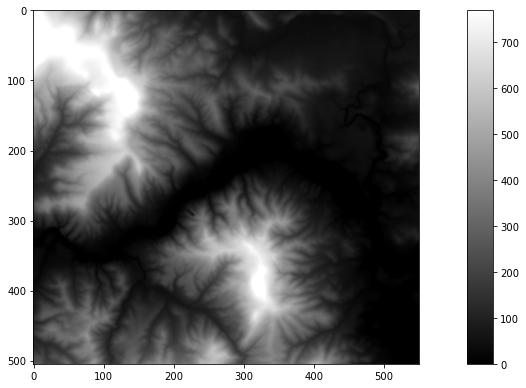

{'vmin': 0.0, 'vmax': 770.0}

In [3]:
rd.rdShow(_dem, figsize=(8,5.5))

**Adding a basic *colourmap* helps distinguish/seperate/identify topography**

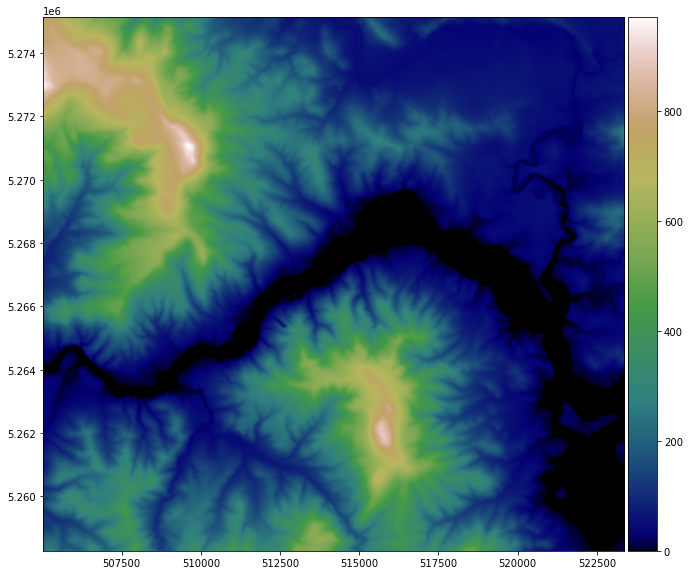

In [10]:
#define a function to plot
def plot_dem(image, cmap='gist_earth', extent=extent):
    #dem = rd.LoadGDAL(image)
    plt.figure(figsize=(11,11))
    ax = plt.gca()
    cmap=cmap
    #x0, x1, y0, y1 = x0, x1, y0, y1
    cb = ax.imshow(image, cmap=cmap, extent=extent)
    #rd.rdShow(image, axes=True, cmap=cmap, figsize=(9, 9))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(cb, cax=cax)
    plt.show()
    
    #return array
plot_dem(_dem)

In [5]:
_dem

rdarray([[750., 751., 750., ...,  61.,  62.,  62.],
         [749., 751., 753., ...,  60.,  61.,  61.],
         [748., 751., 754., ...,  60.,  60.,  61.],
         ...,
         [230., 236., 240., ...,  11.,  12.,  12.],
         [234., 241., 247., ...,  11.,  13.,  13.],
         [242., 248., 255., ...,  12.,  13.,  14.]])

**A histogram is always useful**

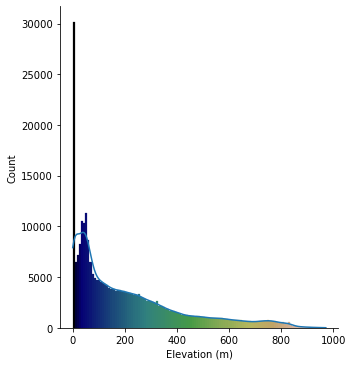

In [27]:
gmap = plt.get_cmap('gist_earth')
ax = sns.displot(_dem.ravel(), height=5, kde=True)
ax = plt.gca()
_ = [patch.set_color(gmap(plt.Normalize(vmin=_dem.min(), 
                                        vmax=_dem.max())(patch.xy[0]))) \
     for patch in ax.patches]
_ = [patch.set_alpha(1) for patch in ax.patches]
plt.xlabel("Elevation (m)")
plt.show()

**slope**

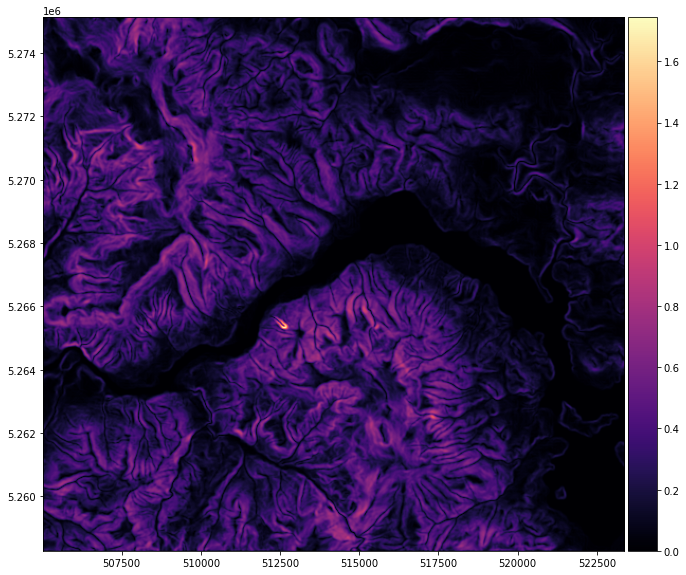

In [28]:
slope = rd.TerrainAttribute(_dem, attrib='slope_riserun')
#rd.SaveGDAL('slope.tif', slope)
plot_dem(slope, cmap='magma')

In [29]:
slope

rdarray([[0.01184722, 0.01498568, 0.03820615, ..., 0.0218452 ,
          0.0218452 , 0.01184722],
         [0.03350901, 0.05298239, 0.0620143 , ..., 0.0264912 ,
          0.02701583, 0.01498568],
         [0.05298239, 0.09477779, 0.07530213, ..., 0.02701583,
          0.02853189, 0.02701583],
         ...,
         [0.11953373, 0.18814345, 0.2014028 , ..., 0.04526817,
          0.03222793, 0.02247852],
         [0.17556289, 0.26496494, 0.28786558, ..., 0.04738889,
          0.03222793, 0.01910307],
         [0.07585924, 0.1820776 , 0.1978167 , ..., 0.03554167,
          0.02369445, 0.01589472]], dtype=float32)

**aspect**

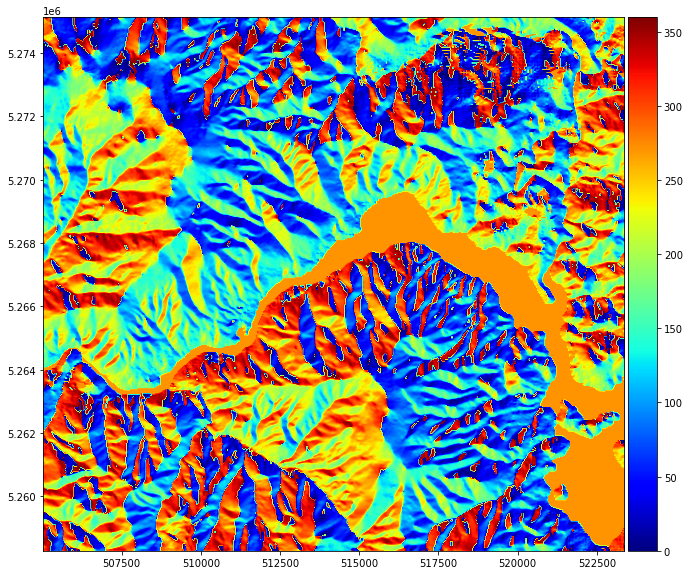

In [30]:
aspect = rd.TerrainAttribute(_dem, attrib='aspect')
#rd.SaveGDAL('aspect.tif', aspect)
plot_dem(aspect, cmap='jet')

In [31]:
aspect

rdarray([[251.56505 , 270.      ,  11.309933, ..., 239.03624 ,
          210.96376 , 198.43495 ],
         [243.43495 , 278.1301  , 334.9831  , ..., 225.      ,
          213.69006 , 180.      ],
         [225.      , 251.56505 , 275.7106  , ..., 213.69006 ,
          203.1986  , 213.69006 ],
         ...,
         [302.19574 , 305.27243 , 316.50745 , ..., 294.44397 ,
          324.4623  ,   0.      ],
         [320.19443 , 316.14575 , 321.34018 , ..., 288.43494 ,
          305.5377  , 348.69006 ],
         [327.09476 , 306.63412 , 307.30396 , ..., 288.43494 ,
          288.43494 , 315.      ]], dtype=float32)

**profile_curvature**

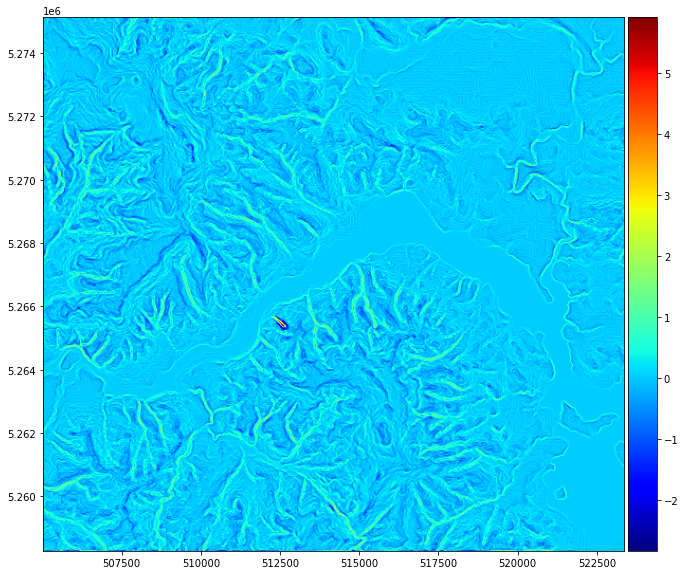

In [32]:
profile_curvature = rd.TerrainAttribute(_dem, attrib='profile_curvature')
#rd.SaveGDAL('profile_curvature.tif', profile_curvature)
plot_dem(profile_curvature, cmap='jet')

In [33]:
profile_curvature

rdarray([[-0.02245707,  0.        ,  0.14510722, ..., -0.03593132,
          -0.11228535, -0.08982828],
         [ 0.08982828,  0.        , -0.05389697, ...,  0.11228535,
          -0.01796566,  0.08982828],
         [ 0.02515192, -0.07186263, -0.08982828, ..., -0.08982828,
           0.03593132, -0.19762222],
         ...,
         [ 0.5831475 ,  0.07355068,  0.35037994, ..., -0.07635404,
           0.        ,  0.        ],
         [ 0.66230905,  0.10130794,  0.18622938, ...,  0.08982828,
          -0.14372526,  0.        ],
         [-0.24433294, -0.31542915, -0.3130003 , ..., -0.13025102,
           0.        , -0.11228535]], dtype=float32)

**planform_curvature**

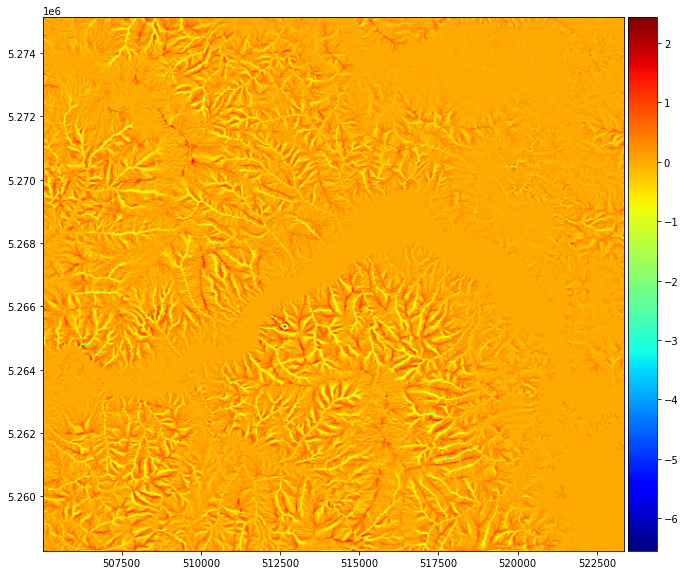

In [34]:
planform_curvature = rd.TerrainAttribute(_dem, attrib='planform_curvature')
#rd.SaveGDAL('planform_curvature.tif', planform_curvature)
plot_dem(planform_curvature, cmap='jet')

In [35]:
planform_curvature

rdarray([[-0.02245707,  0.        , -0.12437762, ...,  0.05389697,
           0.06737121, -0.        ],
         [-0.08982828, -0.        ,  0.30541617, ..., -0.06737121,
           0.07186263, -0.        ],
         [-0.06467637,  0.10779394,  0.17965657, ...,  0.08982828,
          -0.05389697,  0.07186263],
         ...,
         [-0.225307  , -0.01627761, -0.09876148, ...,  0.10330253,
           0.08982828, -0.        ],
         [-0.32580206,  0.01147965,  0.09640109, ..., -0.08982828,
           0.1257596 , -0.        ],
         [-0.06467637,  0.22354057,  0.31579772, ...,  0.04940556,
          -0.        ,  0.06737121]], dtype=float32)

**curvature**

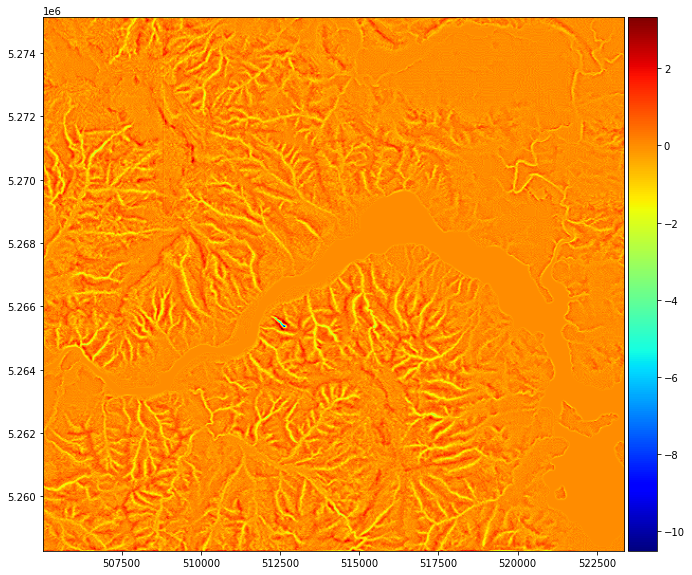

In [36]:
curvature = rd.TerrainAttribute(_dem, attrib='curvature')
#rd.SaveGDAL('curvature.tif', curvature)
plot_dem(curvature, cmap='jet')

In [37]:
curvature

rdarray([[-0.        ,  0.17965657, -0.26948485, ...,  0.08982828,
           0.17965657,  0.08982828],
         [-0.17965657, -0.        ,  0.35931313, ..., -0.17965657,
           0.08982828, -0.08982828],
         [-0.08982828,  0.17965657,  0.26948485, ...,  0.17965657,
          -0.08982828,  0.26948485],
         ...,
         [-0.8084546 , -0.08982828, -0.4491414 , ...,  0.17965657,
           0.08982828, -0.        ],
         [-0.98811114, -0.08982828, -0.08982828, ..., -0.17965657,
           0.26948485, -0.        ],
         [ 0.17965657,  0.5389697 ,  0.628798  , ...,  0.17965657,
          -0.        ,  0.17965657]], dtype=float32)

**Terrain Ruggedness Index (TRI)** - measures the difference between a central pixel and its surrounding cells.

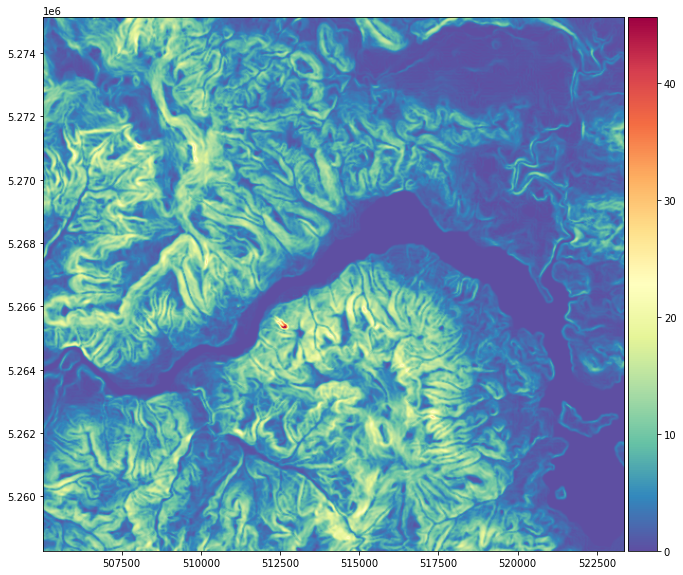

In [19]:
# create an in-memory tri 
# ~ pass a filename between the empty '' and change format if you wish save to disk 
def ruggedness (DEM):
    rg = gdal.DEMProcessing('', DEM, 'TRI',
                           format = 'MEM', computeEdges = True)
    band = rg.GetRasterBand(1)
    array = band.ReadAsArray()
    array[array == -9999] = np.nan
    plot_dem(array, cmap='Spectral_r')#, hill=True)
    return array

rg = ruggedness('tasmania.tif')

In [20]:
rg

array([[0.875, 1.25 , 2.25 , ..., 1.   , 0.875, 0.75 ],
       [1.75 , 1.5  , 2.125, ..., 0.625, 0.625, 0.625],
       [2.75 , 2.5  , 2.375, ..., 0.75 , 0.75 , 1.   ],
       ...,
       [5.125, 4.75 , 5.   , ..., 1.125, 1.   , 0.75 ],
       [6.75 , 6.5  , 7.125, ..., 1.25 , 1.   , 0.75 ],
       [6.5  , 7.375, 8.125, ..., 1.375, 0.75 , 0.875]], dtype=float32)

**hillshade**

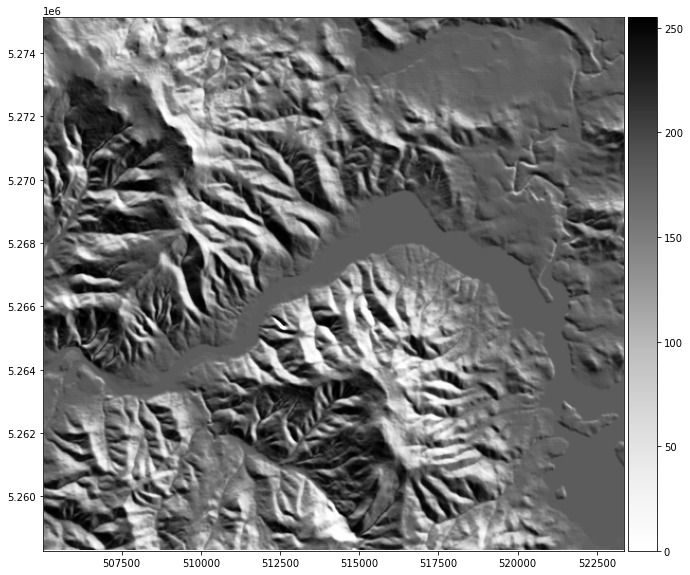

In [38]:
# create an in-memory hillshade 
# ~ pass a filename between the empty '' and change format if you wish save to disk
def hillshade(DEM):
    hill = gdal.DEMProcessing('', DEM, 'hillshade', azimuth=35,
                              altitude=135, zFactor=1.5, alg='Horn',
                              format = 'MEM', addAlpha=True)
    band = hill.GetRasterBand(1)
    array = band.ReadAsArray()
    #array[array == -9999] = np.nan
    plot_dem(array, cmap='Greys')#, hill=True)
    return array

hillsh = hillshade('tasmania.tif')

plot colour over hillshade

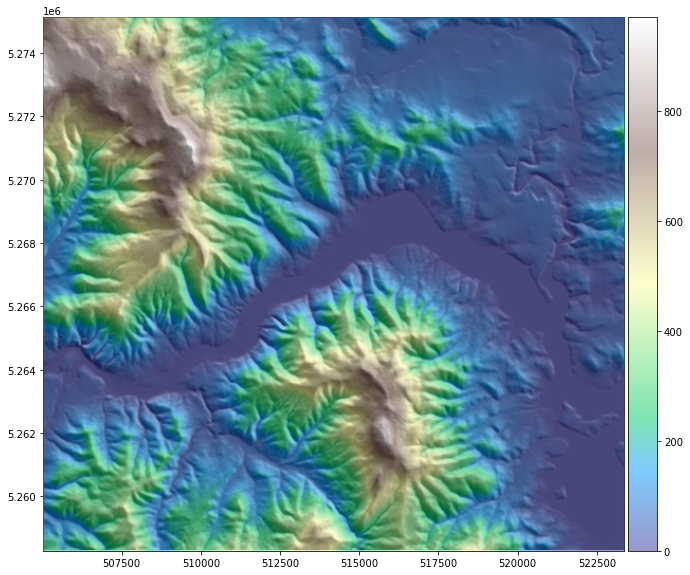

In [39]:
plt.figure(figsize=(11,11))
ax = plt.gca()
#cmap=cmap
cb = ax.imshow(_dem, cmap='terrain', zorder=10, alpha=0.5, extent=[x0, x1, y1, y0])
ax.imshow(hillsh, cmap='Greys', zorder=1, extent=[x0, x1, y1, y0])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cb, cax=cax)
plt.show()

**Extract contours** - to shapefile.

In [23]:
import math

proj = osr.SpatialReference(wkt=ds.GetProjection())

#define not a number
demNan = -9999

contourPath = 'contours.shp'
contourDs = ogr.GetDriverByName("ESRI Shapefile").CreateDataSource(contourPath)

#define layer name and spatial 
contourShp = contourDs.CreateLayer('contour', proj)
#define fields of id and elev
fieldDef = ogr.FieldDefn("ID", ogr.OFTInteger)
contourShp.CreateField(fieldDef)
fieldDef = ogr.FieldDefn("elev", ogr.OFTReal)
contourShp.CreateField(fieldDef)

def roundup(x):
    return int(math.ceil(x / 10.0)) * 10

#define number of contours and range ~ 50m
demMax = roundup(gdalArray.max())
demMin = roundup(gdalArray[gdalArray != demNan].min())
conNum = 50
conList =[int(x) for x in np.linspace(demMin, demMax, conNum)]

#Write shapefile using noDataValue
#ContourGenerate(Band srcBand, double contourInterval, double contourBase, 
#                int fixedLevelCount, int useNoData, double noDataValue, 
#                Layer dstLayer, int idField, int elevField)
gdal.ContourGenerate(band, 0, 0, conList, 1, demNan, 
                     contourShp, 0, 1)

ds = None
contourDs.Destroy()

In [24]:
cnt = gpd.read_file('contours.shp')

In [25]:
cnt.head(3)

ID   elev                                           geometry
0   0   80.0  LINESTRING (520491.768 5275133.368, 520491.768...
1   1  120.0  LINESTRING (519474.130 5275133.368, 519474.130...
2   2  260.0  LINESTRING (509364.481 5275133.368, 509364.481...

Overlay raster with contours

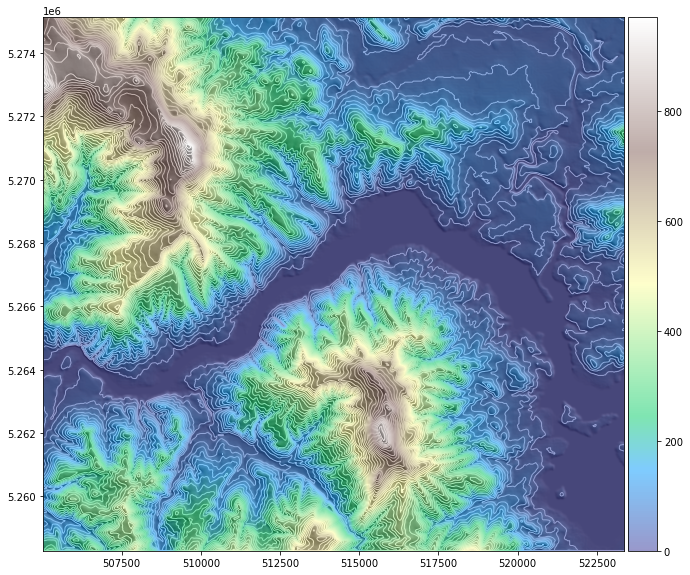

In [26]:
plt.figure(figsize=(11,11))
ax = plt.gca()
#cmap=cmap
cb = ax.imshow(_dem, cmap='terrain', zorder=2, alpha=0.5, extent=[x0, x1, y1, y0])
ax.imshow(hillsh, cmap='Greys', zorder=1, extent=[x0, x1, y1, y0])
cnt.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(cb, cax=cax)
plt.show()

**interactive via PyVista**

![title](ch06_explore2.gif)